In [ ]:
    load and gather the stock data from Apple, Microsoft, IBM, and Google into one big DataFrame with scatter matrix

In [4]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


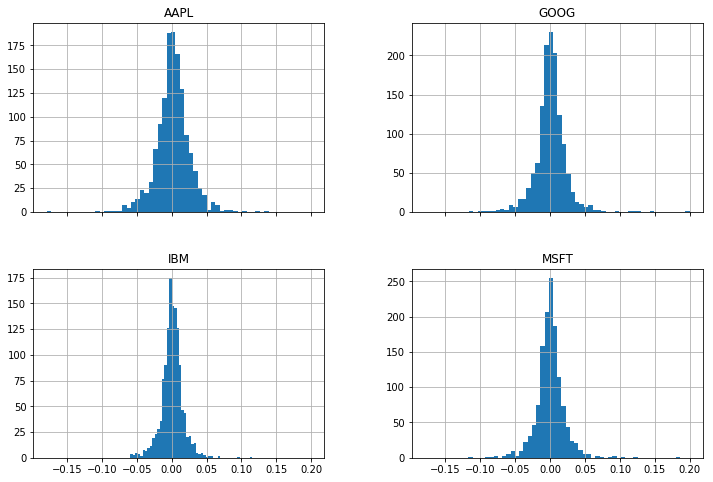

Ticker,AAPL,GOOG,IBM,MSFT
count,1322.000000,1322.000000,1322.000000,1322.000000
mean,0.001566,0.000600,0.000807,0.000240
std,0.023992,0.022041,0.015937,0.020095
min,-0.179195,-0.116091,-0.059195,-0.117131
25%,-0.010672,-0.009125,-0.006803,-0.008953
50%,0.001677,0.000300,0.001028,0.000149
75%,0.014306,0.010558,0.009072,0.009405
max,0.139050,0.199915,0.115150,0.186047


In [14]:
# Isolate the `Adj Close` values and transform the DataFrame
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()
daily_pct_change.describe()

C:\Users\khaoula ilaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


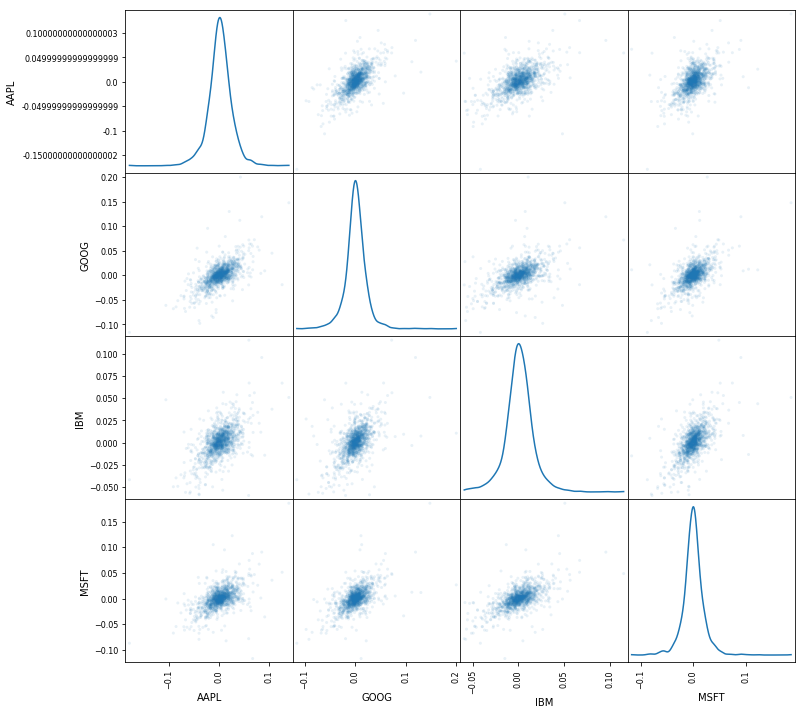

In [11]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()